[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/arunsinp/Python-programming/blob/main/Python-fundamental/zerotopandas_course_project.ipynb/HEAD)

<a href="https://colab.research.google.com/github/arunsinp/Python-programming/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>


# Indian Election Dataset

State and National Level Election Data from 1977 - 2015

## About this dataset

This database contains detailed candidate‐level data for elections to the lower houses of India’s national
and state legislatures, i.e., the Lok Sabha and Vidhan Sabhas. The data span 1977‐2015, with each row
representing a candidate that ran for office in that state‐year.

**The variables in the national election data file are:**

| Variable name |   dtype    |  Description |
|---------------|--------------|-------------------------|
| st_name  |     str35 |     State |
| Year |     Int |    General election year| 
| pc_no |     Byte |     Parliamentary constituency number |
| pc_name |     str25 |     Parliamentary constituency name |
| pc_type |     str3 |    Parliamentary constituency reservation status |
| cand_name |     str70 |     Candidate name |
| cand_sex |     str1 |     Candidate sex | 
| partyname |     str57 |     Party name | 
| partyabbre |     str10 |     Party abbreviation |
| totvotpoll |     Long |     Votes received |
| electors  |     Long |     Number of registered voters |

**The variables in the state election data file are:**

| Variable name |   dtype  |  Description |
|---------------|--------------|-------------------------|
| st_name |     sstr35 |     State |
| Year |     float |     Assembly election year |
| ac_no |     int |     Assembly constituency number|
| ac_name |     str28 |     Assembly constituency name |
| ac_type |     str5 |     Assembly constituency reservation status |
| cand_name |     str98 |     Candidate name |
| cand_sex |     str1 |     Candidate sex | 
| partyname |     str60 |     Party name| 
| partyabbre |     str11 |     Party abbreviation | 
| totvotpoll |     long |     Votes received |
| electors |     long |     Number of registered voters |


**Notes:**
1. There were two state elections in Bihar in 2005. In order to distinguish data for the two elections from one another, data for the second have the year 2005.
2. Data for bye‐elections are not included. Data were sourced from the Election Commission of India’s online reports, and from field visits.

**Acknowledgements** 
- Bhavnani, Rikhil R., 2017, "[India National and State Election Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26526)", Harvard Dataverse Network V2.

## Purpose of the present data analysis

These data can be used to calculate a number of fields, including turnout, vote shares, winning status, effective number of parties and so forth. The present analysis is a part of **Course Project - Exploratory Data Analysis** for the course [Data Analysis with Python: Zero to Pandas](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas). Here we will try to use all the libraries and relevant functions learnt in the course.

## How to run the code

We can run this code in two ways:
1. Google colab
2. Binder

To compile at google colab or binder, just click the link given at the top of this notebook.

# Steps to follow:

- **Step-1:** Selecting a real-world dataset
- **Step-2:** Performing data preparation & cleaning
- **Step-3:** Performing exploratory analysis & visualization
- **Step-4:** Asking & answering questions about the data
- **Step-5:** Summarizing the inferences & writing my conclusions
- **Step-6:** submission & share of the work
- **Step-7:** My link on Medium for the present work

## **Step-1:** Selecting a real-world dataset

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
%pip install jovian opendatasets --upgrade --quiet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/awadhi123/indian-election-dataset'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./indian-election-dataset" (use force=True to force download)


Now we have downloaded the two datasets and has been extracted in `indian-election-dataset` folder:
- `indian-national-level-election.csv`
- `indian-state-level-election.csv`

In [4]:
# Change this
data_dir = './indian-election-dataset'

In [5]:
%pwd

'/Users/arunp77/Documents/Data-science/Python/Python-programming/Python-fundamental'

In [6]:
# Now listing the downloaded files 
import os
os.listdir(data_dir)

['indian-national-level-election.csv', 'indian-state-level-election.csv']

In [7]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [8]:
%pip install jovian --upgrade -q


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import jovian

<IPython.core.display.Javascript object>

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## **Step-2:** Performing data preparation & cleaning

**TODO** - I have divided this section in following steps:

- Substep-1: Import necessary libraries, like numpy, pandas, matplotlib and seaborn
- Substep-2: Then load dataset into a dataframe using pandas. Here I will load two dataset
  - 1976-2020-national-level
  - 1976-2020-state-level
- Substep-3: Data Understanding of the two datasets. For example, 
  - shape, 
  - dtype, 
  - columns 
  
  in the two dataset. 
  
- Substep-4: Data Preparation, such as 
  - Dropping irrelaevant columns and rows
  - Identify duplicated columns
  - renaming Columns
  - Handle missing, incorrect and invalid data
  - Feature creation
- Substep-5: Next joining the two datasets, finding and relations etc.

Before loading the daatafiles, we need to import important libraries, used for the data analysis


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

Lets load the first and second datasets

In [12]:
# Imorting files
national_df = pd.read_csv('./indian-election-dataset/indian-national-level-election.csv')

Data Understanding of the dataset. For example, 
  - shape, 
  - dtype, 
  - columns 

In [13]:
national_df.shape

(73081, 11)

In [14]:
national_df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

Here, we found that the year is int64 type. So wee need to change it to datetime type.

In [15]:
# converting the date into datetime
national_df['year'] = pd.to_datetime(national_df['year'], format='%Y')

In [16]:
# Now converting the year format from 'YYYY-MM-DD' to 'YYYY'
national_df['year'] = national_df['year'].dt.year

In [17]:
# Now again checking the datatype
national_df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

In [18]:
# Now checking the columns of the dataset.
national_df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [19]:
# writing above column names as dataframe format.
col_df = pd.DataFrame(national_df.columns, columns=['Column names'])
col_df

,Column names
0,st_name
1,year
2,pc_no
3,pc_name
4,pc_type
5,cand_name
6,cand_sex
7,partyname
8,partyabbre
9,totvotpoll


In [20]:
# now checking some common statistics
national_df.describe()

,year,pc_no,totvotpoll,electors
count,73081.000000,73081.000000,73081.000000,7.308100e+04
mean,1996.779505,22.311490,49834.760266,1.122277e+06
std,10.432527,19.039793,104893.319706,3.560049e+05
min,1977.000000,1.000000,0.000000,1.947100e+04
25%,1989.000000,7.000000,872.000000,9.129850e+05
50%,1996.000000,18.000000,2743.000000,1.099503e+06
75%,2004.000000,33.000000,19185.000000,1.329086e+06
max,2014.000000,85.000000,863358.000000,3.368399e+06


In [21]:
# Now checkinf the dataset
national_df

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084
...,...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,42,Birbhum,GEN,None Of The Above,NaN,NOTA,NOTA,14557,1495089
73077,West Bengal,2014,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,INC,132084,1495089
73078,West Bengal,2014,42,Birbhum,GEN,Joy Banerjee,M,BJP,BJP,235753,1495089
73079,West Bengal,2014,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,CPM,393305,1495089


So we have total 73081 rows and 11 columnns. we now need to do data preparation for the analysis. Forr exammple:
  - Dropping irrelaevant columns and rows
  - Identify duplicated columns
  - renaming Columns
  - Handle missing, incorrect and invalid data
  - Feature creation

In [22]:
# We have seen that there are many columns and we many not necessarily need all columns
national_dfcopy = national_df[['st_name', 'year', 
      # 'pc_no', 
      'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 
       # 'partyname', 
       'partyabbre', 'totvotpoll', 'electors'
    ]].copy()

In [23]:
national_dfcopy.columns

Index(['st_name', 'year', 'pc_name', 'pc_type', 'cand_name', 'cand_sex',
       'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [24]:
# We can see that some of the column are needed to be changed. To do this
national_dfcopy = national_dfcopy.rename(columns={'st_name': 'State', 
                                                  'year': 'Year', 
                                                  'cand_name': 'Candidate', 
                                                  'partyabbre': 'Party'
                                                  })

In [25]:
# Checking top 5 rows of the dataset
national_dfcopy.head()

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308
1,Andaman & Nicobar Islands,1977,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308
2,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084
3,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084
4,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084


Now we need to find all cells with `NAN`. 

**NaN values:**

- Now to to change the value of a cell with `NaN` to "other", we can use the following code: `df.at[row_label, col_label] = "other"`
- If we want to change all cells with `NaN` values in a particular column to "other", you we use the following code: `df[col_label].fillna("other", inplace=True)`. The `fillna` method fills all `NaN` values in the column with the specified value (in this case, "other"). The `inplace=True` argument specifies that the change should be made in-place, i.e., directly in the original DataFrame, instead of returning a new DataFrame.
- If we want to change all cells with `NaN` values in the entire DataFrame to "other", we can use the following code: `df.fillna("other", inplace=True)`

In [26]:
national_dfcopy.isna().sum()

State            0
Year             0
pc_name          0
pc_type       8070
Candidate        0
cand_sex       542
Party            0
totvotpoll       0
electors         0
dtype: int64

In [27]:
# to find the index of NAN in the dataframe
nan_national_dfcopy_indices = national_dfcopy[national_dfcopy.isna().any(axis=1)].index
nan_national_dfcopy_indices

Int64Index([   64,    65,    66,    67,    68,    69,    70,    71,    72,
               73,
            ...
            72973, 72984, 72997, 73013, 73022, 73032, 73041, 73055, 73064,
            73076],
           dtype='int64', length=8612)

In [28]:
# to find the index of NAN in the dataframe
# loc_president_indices = 
national_dfcopy.loc[national_dfcopy.isna().any(axis=1)]
#print(loc_president_indices)

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
64,Andaman & Nicobar Islands,2009,Andaman & Nicobar Islands,NaN,Shri. T. Ali,M,IND,398,265110
65,Andaman & Nicobar Islands,2009,Andaman & Nicobar Islands,NaN,Dr. Thankachan,M,IND,683,265110
66,Andaman & Nicobar Islands,2009,Andaman & Nicobar Islands,NaN,Shri. N. K. P. Nair,M,CPI(ML),734,265110
67,Andaman & Nicobar Islands,2009,Andaman & Nicobar Islands,NaN,Shri. M. S. Mohan,M,BSP,789,265110
68,Andaman & Nicobar Islands,2009,Andaman & Nicobar Islands,NaN,Shri. Vakiath Valappil Khalid,M,IND,1480,265110
...,...,...,...,...,...,...,...,...,...
73032,West Bengal,2014,Bardhaman Purba,SC,None Of The Above,NaN,NOTA,13951,1532244
73041,West Bengal,2014,Burdwan - Durgapur,GEN,None Of The Above,NaN,NOTA,16886,1583495
73055,West Bengal,2014,Asansol,GEN,None Of The Above,NaN,NOTA,11479,1469684
73064,West Bengal,2014,Bolpur,SC,None Of The Above,NaN,NOTA,17322,1538421


So we can see that there are various places where NaN arises. So we need to either remove it (if it is not relevant) or change it to something, which may represent it well.

In [29]:
# unique 'pc_type' are
national_dfcopy['pc_type'].unique()

array(['GEN', nan, 'ST', 'SC', 'SC '], dtype=object)

We see that there is one nan pc_type. Here we can say that wherever nan is written in this column, the 'parliamentary constituency reservation status' is open. It is not reserved for any particular caste. So we will replace it with Unreserved.

In [30]:
national_dfcopy["pc_type"].fillna("Unreserved", inplace=True)

In [31]:
national_dfcopy['pc_type'].unique()

array(['GEN', 'Unreserved', 'ST', 'SC', 'SC '], dtype=object)

In [32]:
national_dfcopy['cand_sex'].unique()

array(['M', 'F', nan, 'O'], dtype=object)

In [33]:
# Total number of elections from 1977 - 2015
national_dfcopy['Year'].nunique()

11

In [34]:
# Unique years when elections happen during 1977 - 2015
national_dfcopy['Year'].unique()

array([1977, 1980, 1984, 1989, 1991, 1996, 1998, 1999, 2004, 2009, 2014])

In [35]:
national_dfcopy['cand_sex'].isna().sum()

542

So we have 4 options for the reservation for the candidate sex for a particular consituncy. 
- M: Male
- F: Female
- O: Others
- nan: Here we can say that these consituencies are not reserved for particular sex category.

So we can change it to 'Open' for all kind of gender.

In [36]:
national_dfcopy["cand_sex"].fillna("Open", inplace=True)

In [37]:
national_dfcopy['cand_sex'].isna().sum()

0

Now let's check, if there are other columns with NAN values.

In [38]:
national_dfcopy.isna().sum()

State         0
Year          0
pc_name       0
pc_type       0
Candidate     0
cand_sex      0
Party         0
totvotpoll    0
electors      0
dtype: int64

So we have no NAN in any columns.

In [39]:
national_dfcopy.columns

Index(['State', 'Year', 'pc_name', 'pc_type', 'Candidate', 'cand_sex', 'Party',
       'totvotpoll', 'electors'],
      dtype='object')

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## **Step-3:** Performing exploratory analysis & visualization

**TODO** - Here, we ask oursself few questions aand solve it. 
First start with 
- Computing mean, sum, rannge aand other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

Now let's first import few important python libraries for the exploratory analysis and visualization.

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [43]:
national_dfcopy.columns

Index(['State', 'Year', 'pc_name', 'pc_type', 'Candidate', 'cand_sex', 'Party',
       'totvotpoll', 'electors'],
      dtype='object')

**TODO -** Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0, 0.5, 'Counts')

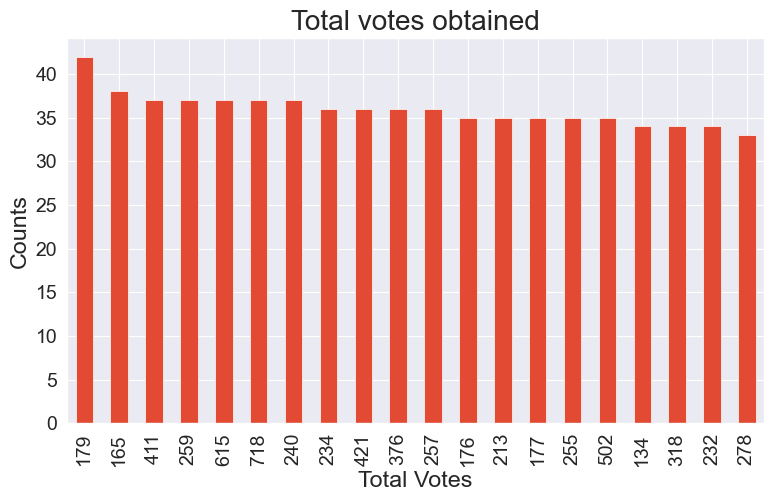

In [44]:
# so to see the year wise number of roller coster introduced
ax = national_dfcopy['totvotpoll'].value_counts()\
    .head(20)\
    .plot(kind='bar', title = 'Total votes obtained')

ax.set_xlabel('Total Votes')
ax.set_ylabel('Counts')

Text(0, 0.5, 'Counts')

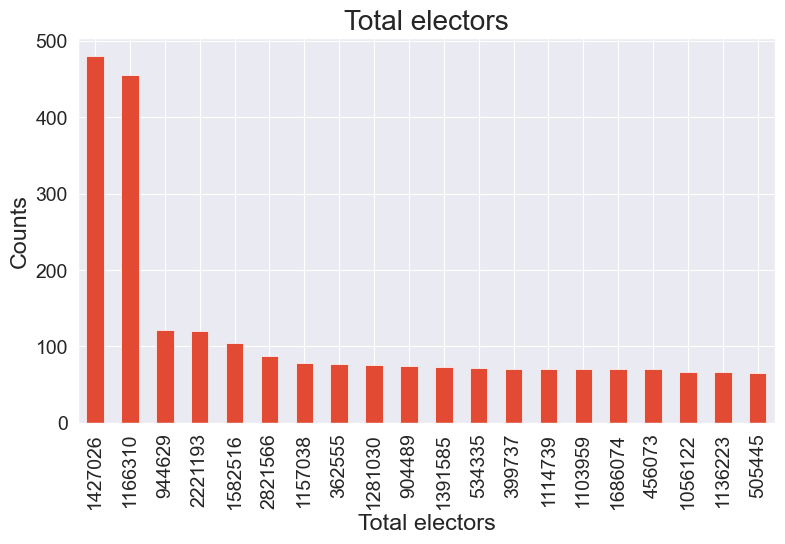

In [45]:
# so to see the year wise number of roller coster introduced
ax = national_dfcopy['electors'].value_counts()\
    .head(20)\
    .plot(kind='bar', title = 'Total electors')

ax.set_xlabel('Total electors')
ax.set_ylabel('Counts')

So what we see here is that, we can not say what does this plot actually plot. What we can do is 
1. How many times or years a particular candidate fight elections.
2. How much votes a candiate obtained in his life time?
3. Party vs totvotpoll in lifetime
4. In each election party performance
5. Each election a candidate performance
6. Leading party in a election
7. top performer in the election and constituency name. 
8. Parties performance sex wise, I mean in which party, womens/men/others have performed well.
9. Largest constituency with respect to electors + yearwise changes.
10. Out of electors which party has gained largest votes?

In [46]:
# The dataframe is
national_dfcopy.head()

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308
1,Andaman & Nicobar Islands,1977,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308
2,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084
3,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084
4,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084


In [47]:
# Total number of elections from 1977 - 2015
national_dfcopy['Year'].nunique()

11

## **Step-4:** Asking & answering questions about the data

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**Question-1** Highest votes obtained from a politician (during 1977-2015)

In [48]:
# Unique candidate, top 10
unique_can = pd.DataFrame(national_dfcopy['Candidate'].unique(), columns=['Candidate'])

unique_can.head(10)

,Candidate
0,K.R. Ganesh
1,Manoranjan Bhakta
2,Ramesh Mazumdar
3,Alagiri Swamy
4,Kannu Chemy
5,K.N. Raju
6,Rajender Lall Saha
7,Karpu Swamy
8,Samar Choudhury
9,K. Kanda Swamy


In [49]:
# group the data by candidate and sum the candidate votes
candidate_votes = pd.DataFrame(national_dfcopy.groupby("Candidate")['totvotpoll'].sum())

In [50]:
ordered_can_votes = candidate_votes.sort_values(['totvotpoll'], ascending=False).head(10) 
ordered_can_votes.drop('None Of The Above')

,totvotpoll
Candidate,
Anil Basu,3513346
Mullappally Ramachandran,3357327
Ram Vilas Paswan,3331489
Mamata Banerjee,3122418
Rupchand Pal,3120584
Sharad Yadav,3051152
Hannan Mollah,3047323
Indrajit Gupta,3000877
Pawar Sharadchandra Govindrao,2994345


Text(0, 0.5, 'Counts')

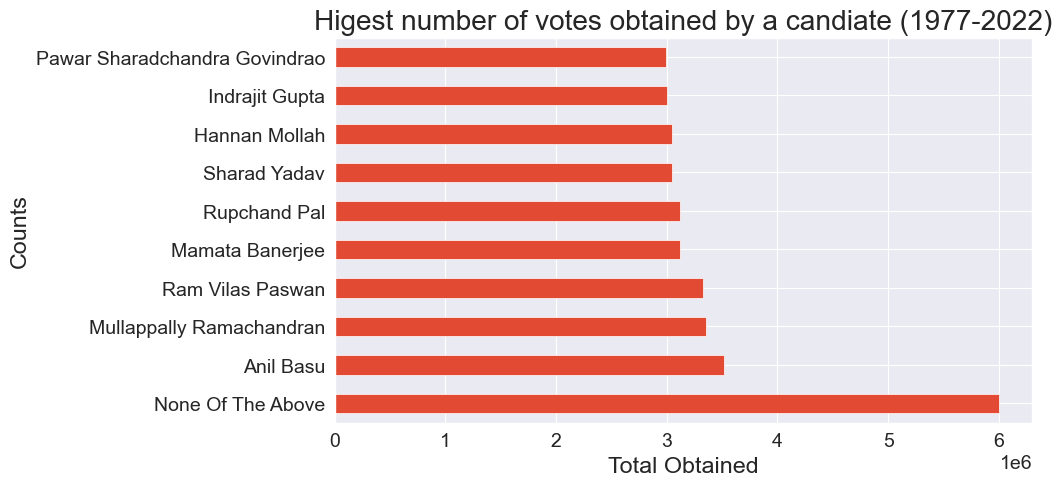

In [51]:
# higest number of votes obtained by a candiate 

# so to see the year wise number of roller coster introduced
ax =ordered_can_votes['totvotpoll']\
    .head(10)\
    .plot(kind='barh', title ='Higest number of votes obtained by a candiate (1977-2022)')
ax.set_xlabel('Total Obtained')
ax.set_ylabel('Counts')

So we have to drop 'None of the Above'. 

Text(0, 0.5, 'Counts')

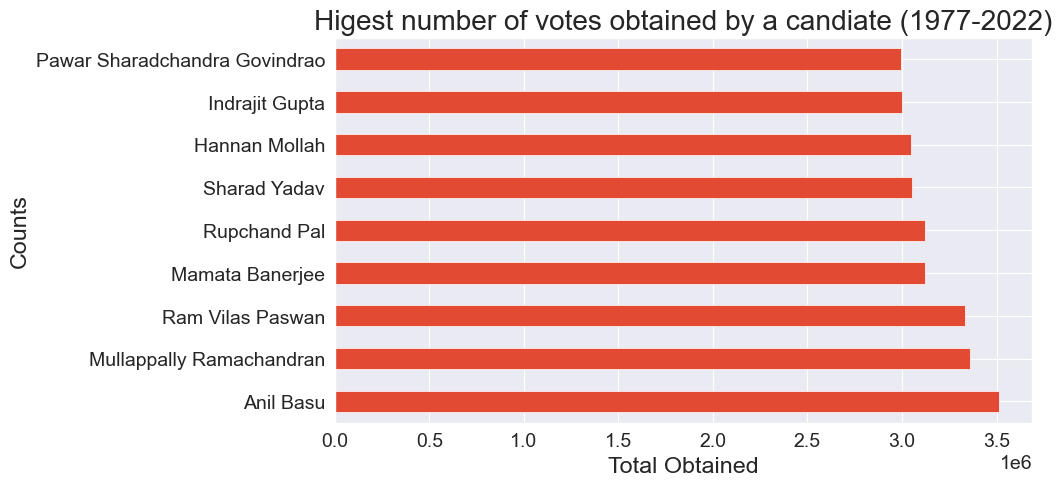

In [52]:
# higest number of votes obtained by a party 

# so to see the year wise number of roller coster introduced
ax =ordered_can_votes.drop('None Of The Above')['totvotpoll']\
    .head(10)\
    .plot(kind='barh', title ='Higest number of votes obtained by a candiate (1977-2022)')
ax.set_xlabel('Total Obtained')
ax.set_ylabel('Counts')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**Question-2:** Highest votes obtained by a party (During 1977-2015)

In [53]:
# Unique candidate, top 10
unique_party = pd.DataFrame(national_dfcopy['Party'].unique(), columns=['Party'])

unique_party.head(10)

,Party
0,IND
1,INC
2,JNP(S)
3,JNP
4,CPM
5,INC(I)
6,LKD
7,ICS(SCS)
8,BJP
9,JP


In [54]:
# group the data by party and sum the candidate votes
party_votes = pd.DataFrame(national_dfcopy.groupby("Party")['totvotpoll'].sum())
party_votes

,totvotpoll
Party,
A S P,557
AAAP,11325387
AAMJP,9371
AAP,4380
AB,138
...,...
rdsc,10800
shsap,2982
skd,20910


In [55]:
ordered_party_votes = party_votes.sort_values(['totvotpoll'], ascending=False).head(10) 
ordered_party_votes

,totvotpoll
Party,
INC,1029298138
BJP,692510718
CPM,192967648
IND,169424612
BSP,126286691
JD,125147470
TDP,98119906
SP,92660343
INC(I),84455313


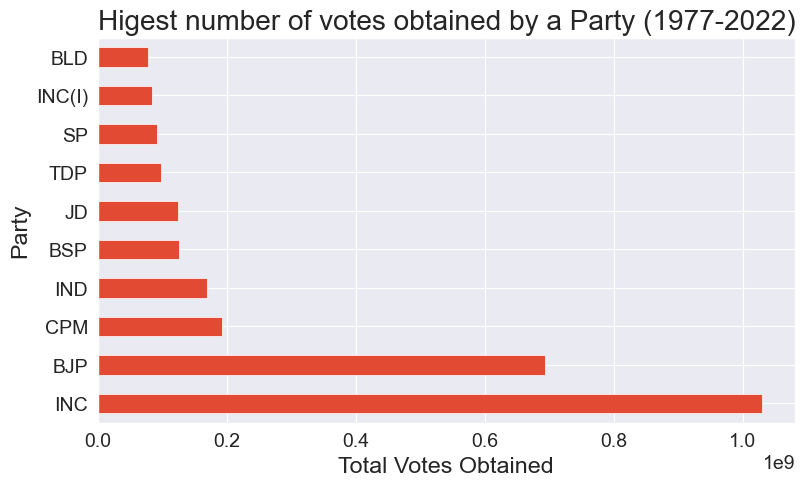

In [56]:
# higest number of votes obtained by a party 

# so to see the year wise number of roller coster introduced
ax =ordered_party_votes['totvotpoll']\
    .head(10)\
    .plot(kind='barh', title ='Higest number of votes obtained by a Party (1977-2022)')
ax.set_xlabel('Total Votes Obtained')
ax.set_ylabel('Party');

So we can see that the two national parties; INC & BJP shares most votes in India between 1977 and 2015. 

Adding a Voting % to each row of data.

In [57]:
national_dfcopy['totvotpoll'].sum()

3641974115

In [58]:
national_dfcopy['Voting %'] = national_dfcopy['totvotpoll']*100/national_dfcopy['electors']
national_dfcopy

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Voting %
0,Andaman & Nicobar Islands,1977,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,IND,25168,85308,29.502509
1,Andaman & Nicobar Islands,1977,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,INC,35400,85308,41.496694
2,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,IND,109,96084,0.113442
3,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,IND,125,96084,0.130095
4,Andaman & Nicobar Islands,1980,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,IND,405,96084,0.421506
...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,Birbhum,GEN,None Of The Above,Open,NOTA,14557,1495089,0.973654
73077,West Bengal,2014,Birbhum,GEN,Syed Siraj Jimmi,M,INC,132084,1495089,8.834524
73078,West Bengal,2014,Birbhum,GEN,Joy Banerjee,M,BJP,235753,1495089,15.768493
73079,West Bengal,2014,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,393305,1495089,26.306461


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**Question-3:** Yearwise data extraction and partywise and candidate wise performance.

In [59]:
# Data for 2014 and for all states.
national_dfcopy_2014 = national_dfcopy[national_dfcopy['Year']==2014]
national_dfcopy_2014

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Voting %
75,Andaman & Nicobar Islands,2014,Andaman & Nicobar Islands,GEN,A Pandian,M,AIFB,225,269360,0.083531
76,Andaman & Nicobar Islands,2014,Andaman & Nicobar Islands,GEN,N Kannan,M,IND,314,269360,0.116573
77,Andaman & Nicobar Islands,2014,Andaman & Nicobar Islands,GEN,C G Saji Kumar,M,IND,334,269360,0.123998
78,Andaman & Nicobar Islands,2014,Andaman & Nicobar Islands,GEN,Raghubir Singh,M,SP,379,269360,0.140704
79,Andaman & Nicobar Islands,2014,Andaman & Nicobar Islands,GEN,V V Khalid,M,IND,429,269360,0.159266
...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,Birbhum,GEN,None Of The Above,Open,NOTA,14557,1495089,0.973654
73077,West Bengal,2014,Birbhum,GEN,Syed Siraj Jimmi,M,INC,132084,1495089,8.834524
73078,West Bengal,2014,Birbhum,GEN,Joy Banerjee,M,BJP,235753,1495089,15.768493
73079,West Bengal,2014,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,393305,1495089,26.306461


Filtering 2014 data for Uttar Pradesh

In [60]:
# Data for 2014 and for all states.
national_dfcopy_2014_UP = national_dfcopy[national_dfcopy['State']=='Uttar Pradesh']
national_dfcopy_2014_UP

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Voting %
54433,Uttar Pradesh,1977,Tehri Garhwal,GEN,Gunanand,M,IND,3351,538207,0.622623
54434,Uttar Pradesh,1977,Tehri Garhwal,GEN,Vidhyasagar Nautiyal,M,CPI,26776,538207,4.975037
54435,Uttar Pradesh,1977,Tehri Garhwal,GEN,Hirasingh Bist,M,INC,70267,538207,13.055757
54436,Uttar Pradesh,1977,Tehri Garhwal,GEN,Trepansingh Negi,M,BLD,141338,538207,26.260900
54437,Uttar Pradesh,1977,Garhwal,GEN,Ravindra Singh,M,IND,4510,563082,0.800949
...,...,...,...,...,...,...,...,...,...,...
69219,Uttar Pradesh,2014,Robertsganj,SC,Ashok Kumar Kannaoujiya,M,CPI,24363,1639074,1.486388
69220,Uttar Pradesh,2014,Robertsganj,SC,Bhagwati Prasad Chaudhary,M,INC,86235,1639074,5.261202
69221,Uttar Pradesh,2014,Robertsganj,SC,Pakaudi Lal Kol,M,SP,135966,1639074,8.295294
69222,Uttar Pradesh,2014,Robertsganj,SC,Sharada Prasad,M,BSP,187725,1639074,11.453113


Finding the constituency wise, leader of the party.

In [61]:
# filter for UP and 2014
national_dfcopy_2014_UP = national_dfcopy[(national_dfcopy['State'] == 'Uttar Pradesh') & (national_dfcopy['Year'] == 2014)]

# group by constituency and find the party with the highest votes
df_party_max = national_dfcopy_2014_UP.groupby('pc_name').agg({'Party': 'first', 'totvotpoll': 'max',  'Voting %': 'max'})

# print the results
df_party_max

,Party,totvotpoll,Voting %
pc_name,,,
Agra,A S P,583716,32.165287
Akbarpur,JD(U),481584,27.229134
Aligarh,BMUP,514622,28.699712
Allahabad,IND,313772,18.827423
Ambedkar Nagar,SPP,432104,25.140245
...,...,...,...
Shrawasti,AAAP,345964,19.348351
Sitapur,CPIM,417546,26.933882
Sultanpur,MBCOI,410348,24.085724


In [62]:
up_2014df_max_voted_party = pd.DataFrame(national_dfcopy_2014_UP.groupby('Party')['totvotpoll'].sum()) # here we sum max voted party and then sum it
up2014_df_part = up_2014df_max_voted_party.sort_values(by= 'totvotpoll', ascending=False).reset_index().head() # here we sort parties with sum on totalvalues and then printed top 5 parties.
up2014_df_part

,Party,totvotpoll
0,BJP,34318854
1,SP,17988967
2,BSP,15914194
3,INC,6061267
4,IND,1414869


Partywise total Votes obtained.

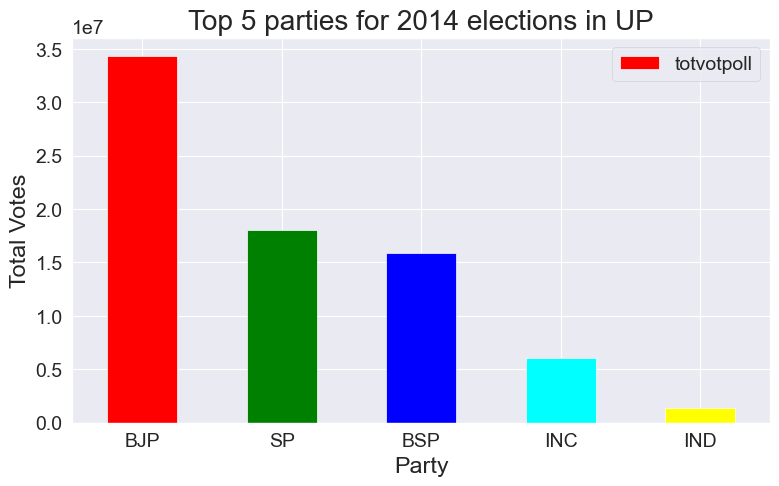

In [63]:
ax = up2014_df_part.plot.bar(x='Party', y='totvotpoll', color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])


ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

ax.set_title('Top 5 parties for 2014 elections in UP')
ax.set_xlabel('Party')
ax.set_ylabel('Total Votes')
ax.set_xticklabels(up2014_df_part['Party'], rotation=0) # Here I added this ine to change the xticks to rotate horizontally. By default it was 90 degree rotated.
plt.show()

Pi plot

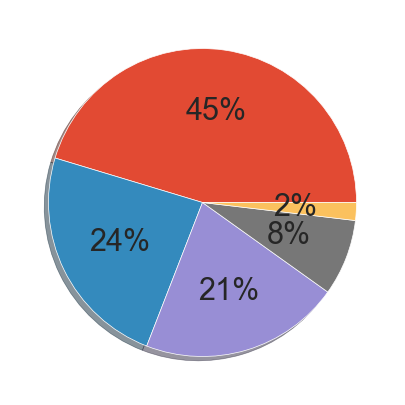

In [90]:
labels = up2014_df_part['Party']

# Plot the pie chart
myexplode = (0.2, 0, 0, 0)

ax = plt.pie(up2014_df_part['totvotpoll'], shadow = True, autopct='%1.0f%%')

# plt.title('1977 West Bengal Elections\nParty-wise Distribution of Votes')
#plt.legend(title=label, loc='best', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

**ToDO:** 

**Qestion-4:** Finding the consitutency won by a party in each states

In [65]:
# finding the row with the highest 'totvotpoll' for each 'pc_name' group.
# group the data by 'pc_name' and find the row with the highest 'totvotpoll' for each group

national_dfcopy_1977max = national_dfcopy_2014.loc[national_dfcopy_2014.groupby('pc_name')['totvotpoll'].idxmax()]
national_dfcopy_1977max

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Voting %
4695,Andhra Pradesh,2014,Adilabad,ST,Godam Nagesh,M,TRS,430847,1386282,31.079319
68135,Uttar Pradesh,2014,Agra,SC,Dr. Ram Shankar Katheria,M,BJP,583716,1814739,32.165287
39295,Maharashtra,2014,Ahmadnagar,GEN,Gandhi Dilipkumar Mansukhlal,M,BJP,605185,1705005,35.494617
18267,Gujarat,2014,Ahmedabad East,GEN,Paresh Rawal,M,BJP,633582,1601832,39.553586
18279,Gujarat,2014,Ahmedabad West,SC,Dr. Kirit P Solanki,M,BJP,617104,1534400,40.217935
...,...,...,...,...,...,...,...,...,...,...
38715,Maharashtra,2014,Wardha,GEN,Ramdas Chandrabhanji Tadas,M,BJP,537518,1564552,34.356033
27595,Kerala,2014,Wayanad,GEN,M I Shanavas,M,INC,377035,1249420,30.176802
42001,Nct Of Delhi,2014,West Delhi,GEN,Parvesh Sahib Singh Verma,M,BJP,651395,2039410,31.940365
38858,Maharashtra,2014,Yavatmal-Washim,GEN,Gawali Bhavana Pundlikrao,F,SHS,477905,1755292,27.226524


In [66]:
national_dfcopy_1977max['State'].unique()

array(['Andhra Pradesh', 'Uttar Pradesh', 'Maharashtra', 'Gujarat',
       'Rajasthan', 'Kerala', 'West Bengal', 'Uttarakhand', 'Haryana',
       'Punjab', 'Jammu & Kashmir', 'Andaman & Nicobar Islands',
       'Tamil Nadu', 'Bihar', 'Arunachal Pradesh', 'Odisha', 'Assam',
       'Karnataka', 'Madhya Pradesh', 'Chhattisgarh', 'Chandigarh',
       'Nct Of Delhi', 'Jharkhand', 'Dadra & Nagar Haveli', 'Daman & Diu',
       'Manipur', 'Himachal Pradesh', 'Lakshadweep', 'Mizoram',
       'Nagaland', 'Goa', 'Puducherry', 'Meghalaya', 'Sikkim', 'Tripura'],
      dtype=object)

In [67]:
# change the display options to show all rows and columns
orig_max_rows = pd.options.display.max_rows
orig_max_columns = pd.options.display.max_columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# display the first DataFrame
display(pd.DataFrame(national_dfcopy_1977max.groupby(['State', 'Party'])['Candidate'].count()))

# restore the original display options
pd.options.display.max_rows = orig_max_rows
pd.options.display.max_columns = orig_max_columns


Candidate
State                     Party            
Andaman & Nicobar Islands BJP             1
Andhra Pradesh            AIMIM           1
                          BJP             3
                          INC             2
                          TDP            16
                          TRS            11
                          YSRCP           9
Arunachal Pradesh         BJP             1
                          INC             1
Assam                     AIUDF           3
                          BJP             7
                          INC             3
                          IND             1
Bihar                     BJP            20
                          BLSP            3
                          INC             2
                          JD(U)           2
                          LJP             6
                          NCP             1
                          RJD             4
Chandigarh                BJP             1
Chhattisgarh              BJP            10
                          INC             1
Dadra & Nagar Haveli      BJP             1
Daman & Diu               BJP             1
Goa                       BJP             2
Gujarat                   BJP            26
Haryana                   BJP             7
                          INC             1
                          INLD            2
Himachal Pradesh          BJP             3
Jammu & Kashmir           BJP             3
                          JKPDP           3
Jharkhand                 BJP            12
                          JMM             2
Karnataka                 BJP            17
                          INC             9
                          JD(S)           2
Kerala                    CPI             1
                          CPM             5
                          INC             8
                          IND             2
                          IUML            2
                          KEC(M)          1
                          RSP             1
Lakshadweep               NCP             1
Madhya Pradesh            BJP            27
                          INC             2
Maharashtra               BJP            23
                          INC             2
                          NCP             4
                          SHS            18
                          SWP             1
Manipur                   INC             2
Meghalaya                 INC             1
                          NPEP            1
Mizoram                   INC             1
Nagaland                  NPF             1
Nct Of Delhi              BJP             7
Odisha                    BJD            20
                          BJP             1
Puducherry                AINRC           1
Punjab                    AAAP            4
                          BJP             2
                          INC             3
                          SAD             4
Rajasthan                 BJP            25
Sikkim                    SDF             1
Tamil Nadu                ADMK           37
                          BJP             1
                          PMK             1
Tripura                   CPM             2
Uttar Pradesh             AD              2
                          BJP            71
                          INC             2
                          SP              5
Uttarakhand               BJP             5
West Bengal               AITC           34
                          BJP             2
                          CPM             2
                          INC             4

**TODO:** 

**Question-5:** For 1977, West Bengal Data

In [68]:
# filter for the year 2019 and the state of Delhi
national_dfcopy1977WB = national_dfcopy.loc[(national_dfcopy['Year'] == 1977) & (national_dfcopy['State'] == 'West Bengal')]

# display the filtered DataFrame
national_dfcopy1977WB

,State,Year,pc_name,pc_type,Candidate,cand_sex,Party,totvotpoll,electors,Voting %
69433,West Bengal,1977,Cooch Behar,SC,Benoy Krishna Daschowdhury,M,INC,123663,570556,21.674121
69434,West Bengal,1977,Cooch Behar,SC,Amrendranath Roy Pradhan,M,FBL,226521,570556,39.701800
69435,West Bengal,1977,Alipurduars,ST,Tuna Oraon,M,INC,127297,523297,24.325956
69436,West Bengal,1977,Alipurduars,ST,Pius Tirkey,M,RSP,167865,523297,32.078342
69437,West Bengal,1977,Jalpaiguri,GEN,Panchanan Mallick,M,IND,5071,529606,0.957504
...,...,...,...,...,...,...,...,...,...,...
69599,West Bengal,1977,Bolpur,GEN,Saradish Roy,M,CPM,128963,550289,23.435504
69600,West Bengal,1977,Birbhum,SC,Kanai Saha,M,IND,16206,553221,2.929390
69601,West Bengal,1977,Birbhum,SC,Brajagopal Saha,M,SUC,19913,553221,3.599466
69602,West Bengal,1977,Birbhum,SC,Birendaban Saha,M,INC,105968,553221,19.154732


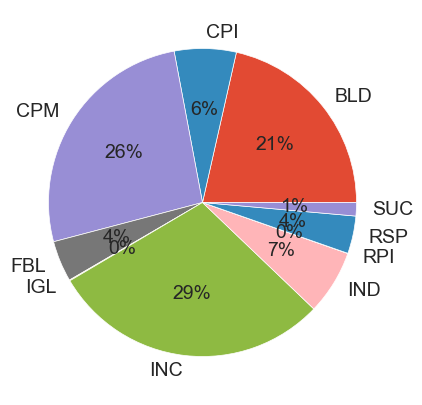

In [69]:
# Filter the data for 1977 and West Bengal
national_dfcopy_1977_wb = national_dfcopy[(national_dfcopy['Year'] == 1977) & (national_dfcopy['State'] == 'West Bengal')]

# Group the data by party and sum the total votes
national_dfcopy_party_votes = national_dfcopy_1977_wb.groupby(['Party'])['totvotpoll'].sum().reset_index()

# Find the party with the highest total votes and label it
max_party = national_dfcopy_party_votes.loc[national_dfcopy_party_votes['totvotpoll'].idxmax(), 'Party']
max_votes = national_dfcopy_party_votes.loc[national_dfcopy_party_votes['totvotpoll'].idxmax(), 'totvotpoll']

label = national_dfcopy_party_votes['Party']
#label = max_party + ' (' + str(max_votes) + ')'

# Set the background color to white
plt.rcParams['axes.facecolor'] = 'white'

# Plot the pie chart
plt.pie(national_dfcopy_party_votes['totvotpoll'], labels= label, autopct='%1.0f%%')
# plt.title('1977 West Bengal Elections\nParty-wise Distribution of Votes')
#plt.legend(title=label, loc='best', bbox_to_anchor=(1, 1))
plt.show()


In [70]:
national_dfcopy1977WB.groupby(['State', 'Party'])['Candidate'].count()

State        Party
West Bengal  BLD      15
             CPI       8
             CPM      20
             FBL       3
             IGL       1
             INC      34
             IND      79
             RPI       1
             RSP       3
             SUC       7
Name: Candidate, dtype: int64

In [71]:
party_list = national_dfcopy1977WB['Party'].unique().tolist()

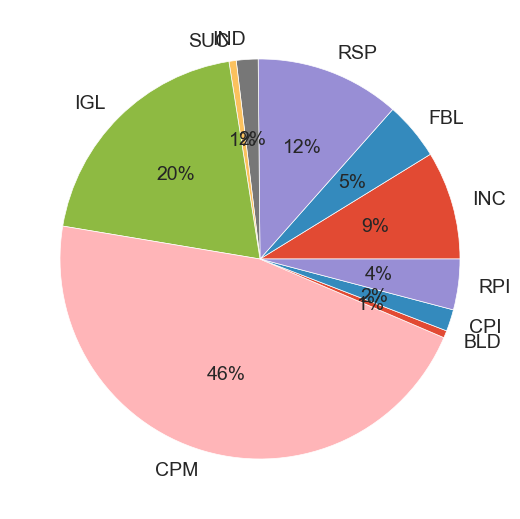

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(national_dfcopy1977WB.groupby(['State', 'Party'])['Candidate'].count(), labels=party_list, autopct='%1.0f%%')

plt.show()

Now check the barr plot for eeach party in 1977 election in West Bengal partywise.

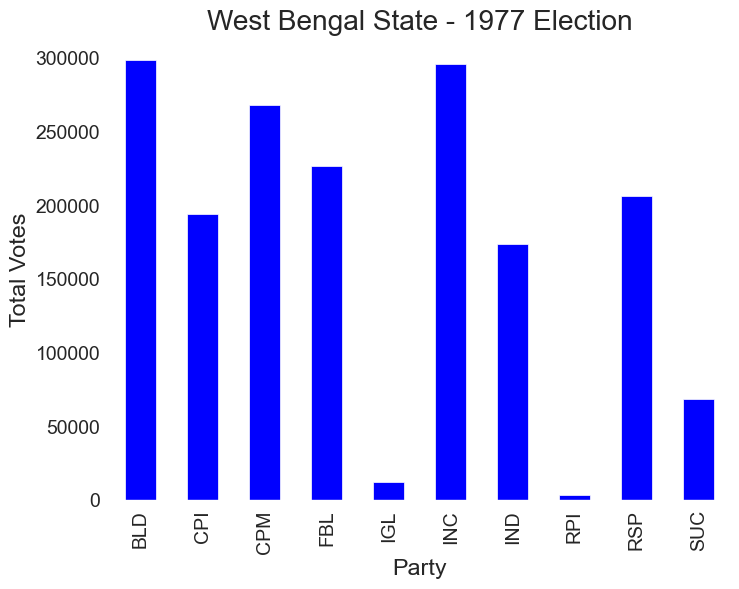

In [73]:
# Filter for West Bengal state in 1977 election
df_wb_1977 = national_dfcopy[(national_dfcopy['State'] == 'West Bengal') & (national_dfcopy['Year'] == 1977)]

# Group by party and sum the total votes
party_max_votes = df_wb_1977.groupby('Party')['totvotpoll'].max()

# Create a bar plot
ax = party_max_votes.plot(kind='bar', color='b', figsize=(8,6))
ax.set_xlabel('Party')
ax.set_ylabel('Total Votes')
ax.set_title('West Bengal State - 1977 Election')
plt.show()

**Question-6:** Plot the total votes corresponding to each party(top 8) for each year?

In [74]:
yearwise_partywise_total_votes = national_dfcopy.groupby(['Year','Party'])['totvotpoll'].sum()
yearwise_partywise_total_votes = pd.DataFrame(yearwise_partywise_total_votes).reset_index()
years = yearwise_partywise_total_votes['Year'].unique()
yearwise_partywise_total_votes_again = {}
for year in list(years):
    yearwise_partywise_total_votes_again['Year_' + f'{year}'] = yearwise_partywise_total_votes[yearwise_partywise_total_votes['Year'] == year].sort_values(by = 'totvotpoll',ascending= False).head(8)

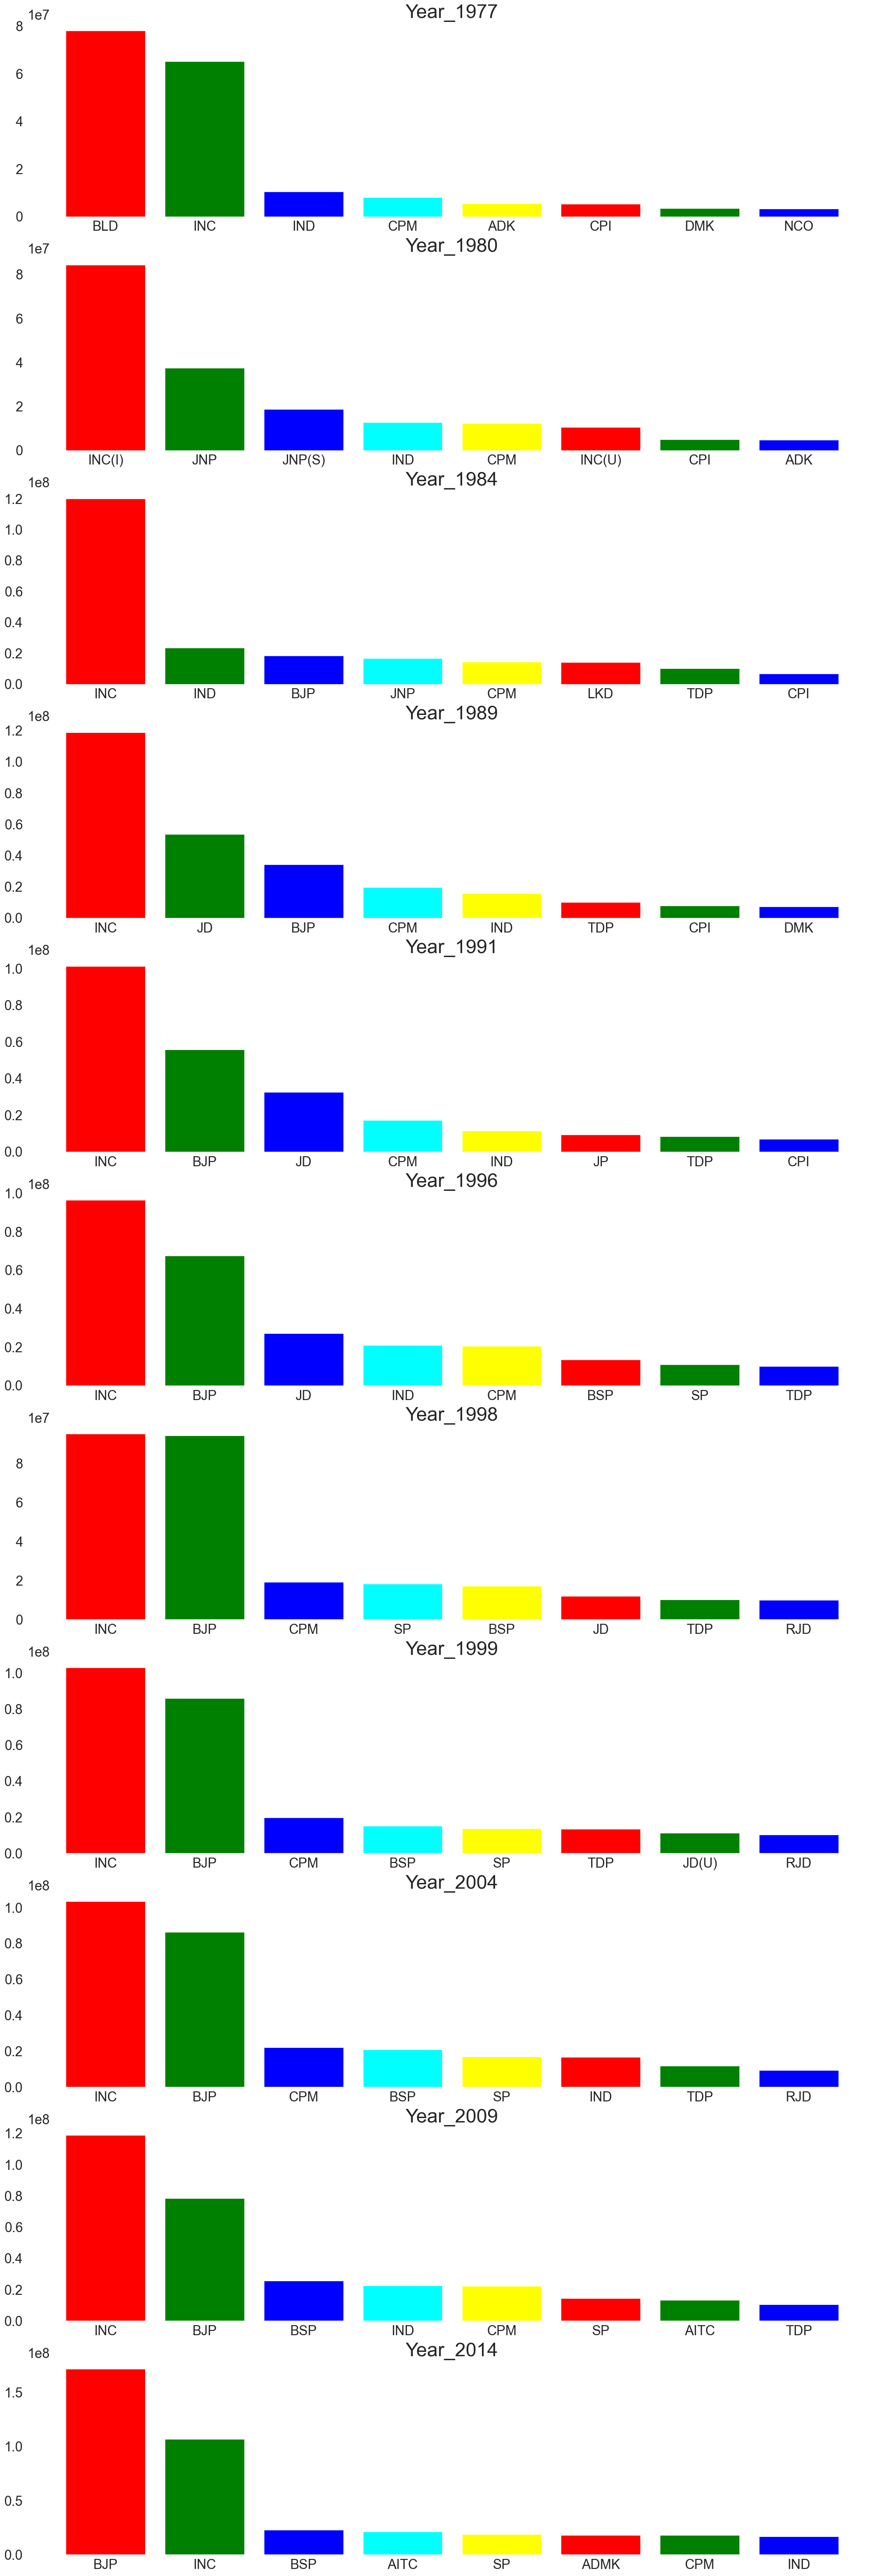

In [75]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (25,75))
for index,(key,value)  in enumerate(yearwise_partywise_total_votes_again.items()):
    dataframe = yearwise_partywise_total_votes_again[key]
    plt.subplot(11, 1, index+1)
    plt.bar(dataframe['Party'],dataframe['totvotpoll'],color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
    plt.title(key)

Let us save and upload our work to Jovian before continuing

In [76]:
import jovian

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## **Step-4:** Asking & answering questions about the data

1. Highest votes obtained from a politician (during 1977-2015)

Text(0, 0.5, 'Counts')

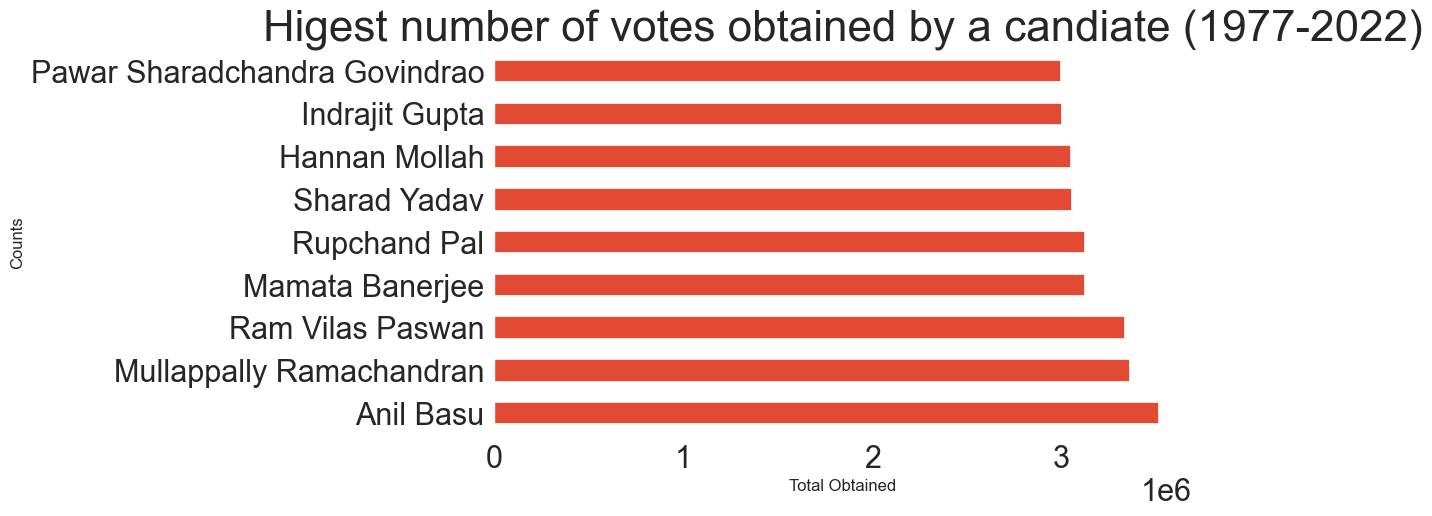

In [165]:
# higest number of votes obtained by a party 

# so to see the year wise number of roller coster introduced
ax =ordered_can_votes.drop('None Of The Above')['totvotpoll']\
    .head(10)\
    .plot(kind='barh', title ='Higest number of votes obtained by a candiate (1977-2022)')
ax.set_xlabel('Total Obtained', fontsize=12)
ax.set_ylabel('Counts', fontsize =12)



2. Highest votes obtained by a party (During 1977-2015)

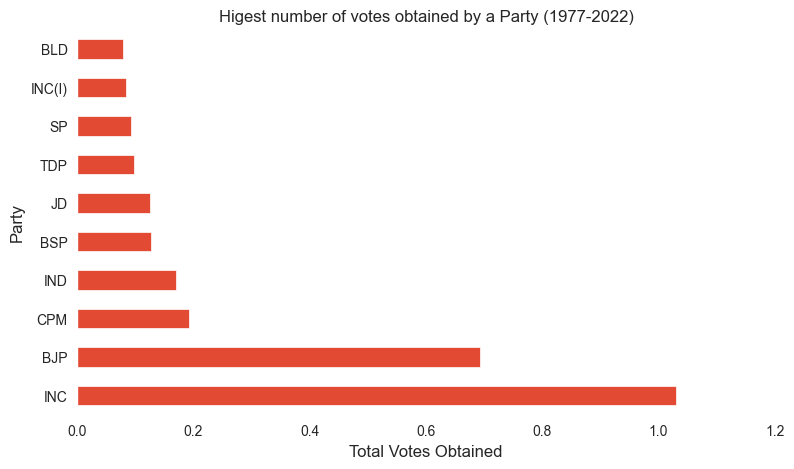

In [161]:
# higest number of votes obtained by a party 
title_plot = 'Higest number of votes obtained by a Party (1977-2022)'

# so to see the year wise number of roller coster introduced
ax =ordered_party_votes['totvotpoll']\
    .head(10)\
    .plot(kind='barh')

ax.set_xlabel('Total Votes Obtained', fontsize=12)
ax.set_ylabel('Party', fontsize=12)

ax.set_title(title_plot, fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

# set font size of x and y tick labels
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10);

3. Highest votes obtained by a party in UP 2014 election

In [126]:
up2014_df_part

,Party,totvotpoll
0,BJP,34318854
1,SP,17988967
2,BSP,15914194
3,INC,6061267
4,IND,1414869


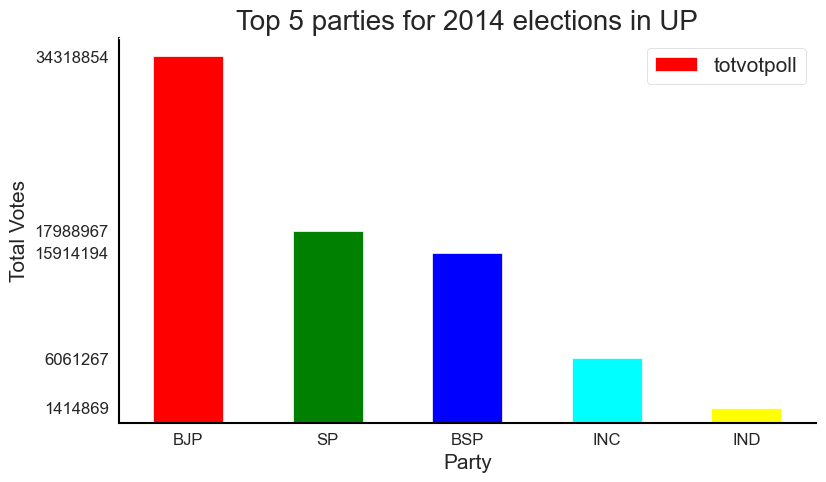

In [140]:
ax = up2014_df_part.plot.bar(x='Party', y='totvotpoll', color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])


ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=15)

ax.set_title('Top 5 parties for 2014 elections in UP', fontsize=20)
ax.set_xlabel('Party', fontsize=15)
ax.set_ylabel('Total Votes', fontsize=15)
ax.set_xticklabels(up2014_df_part['Party'], rotation = 0, fontsize=12) 
# Here I added this ine to change the xticks to rotate horizontally. By default it was 90 degree rotated.
ax.set_yticks(up2014_df_part['totvotpoll'])
ax.set_yticklabels(up2014_df_part['totvotpoll'], fontsize=12)

# set the visibility, linewidth, and color of the axis lines
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')


plt.show()

5. Contributions: 

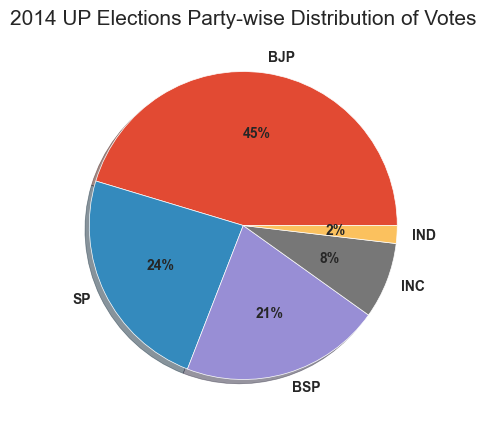

In [117]:
party_list1 = up2014_df_part['Party'].unique().tolist()
# Plot the pie chart

ax = plt.pie(up2014_df_part['totvotpoll'], autopct='%1.0f%%', textprops={'fontsize': 10, 'weight': 'bold'}, labels = party_list1, shadow=True)

plt.title('2014 UP Elections Party-wise Distribution of Votes', fontsize=15)

#plt.legend(title=label, loc='best', bbox_to_anchor=(1, 1))
plt.show()


6. Finding the consitutency won by a party in each states

In [82]:
# change the display options to show all rows and columns
orig_max_rows = pd.options.display.max_rows
orig_max_columns = pd.options.display.max_columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# display the first DataFrame
display(pd.DataFrame(national_dfcopy_1977max.groupby(['State', 'Party'])['Candidate'].count()))

# restore the original display options
pd.options.display.max_rows = orig_max_rows
pd.options.display.max_columns = orig_max_columns

Candidate
State                     Party            
Andaman & Nicobar Islands BJP             1
Andhra Pradesh            AIMIM           1
                          BJP             3
                          INC             2
                          TDP            16
                          TRS            11
                          YSRCP           9
Arunachal Pradesh         BJP             1
                          INC             1
Assam                     AIUDF           3
                          BJP             7
                          INC             3
                          IND             1
Bihar                     BJP            20
                          BLSP            3
                          INC             2
                          JD(U)           2
                          LJP             6
                          NCP             1
                          RJD             4
Chandigarh                BJP             1
Chhattisgarh              BJP            10
                          INC             1
Dadra & Nagar Haveli      BJP             1
Daman & Diu               BJP             1
Goa                       BJP             2
Gujarat                   BJP            26
Haryana                   BJP             7
                          INC             1
                          INLD            2
Himachal Pradesh          BJP             3
Jammu & Kashmir           BJP             3
                          JKPDP           3
Jharkhand                 BJP            12
                          JMM             2
Karnataka                 BJP            17
                          INC             9
                          JD(S)           2
Kerala                    CPI             1
                          CPM             5
                          INC             8
                          IND             2
                          IUML            2
                          KEC(M)          1
                          RSP             1
Lakshadweep               NCP             1
Madhya Pradesh            BJP            27
                          INC             2
Maharashtra               BJP            23
                          INC             2
                          NCP             4
                          SHS            18
                          SWP             1
Manipur                   INC             2
Meghalaya                 INC             1
                          NPEP            1
Mizoram                   INC             1
Nagaland                  NPF             1
Nct Of Delhi              BJP             7
Odisha                    BJD            20
                          BJP             1
Puducherry                AINRC           1
Punjab                    AAAP            4
                          BJP             2
                          INC             3
                          SAD             4
Rajasthan                 BJP            25
Sikkim                    SDF             1
Tamil Nadu                ADMK           37
                          BJP             1
                          PMK             1
Tripura                   CPM             2
Uttar Pradesh             AD              2
                          BJP            71
                          INC             2
                          SP              5
Uttarakhand               BJP             5
West Bengal               AITC           34
                          BJP             2
                          CPM             2
                          INC             4

7. Plot the total votes corresponding to each party(top 8) for each year?

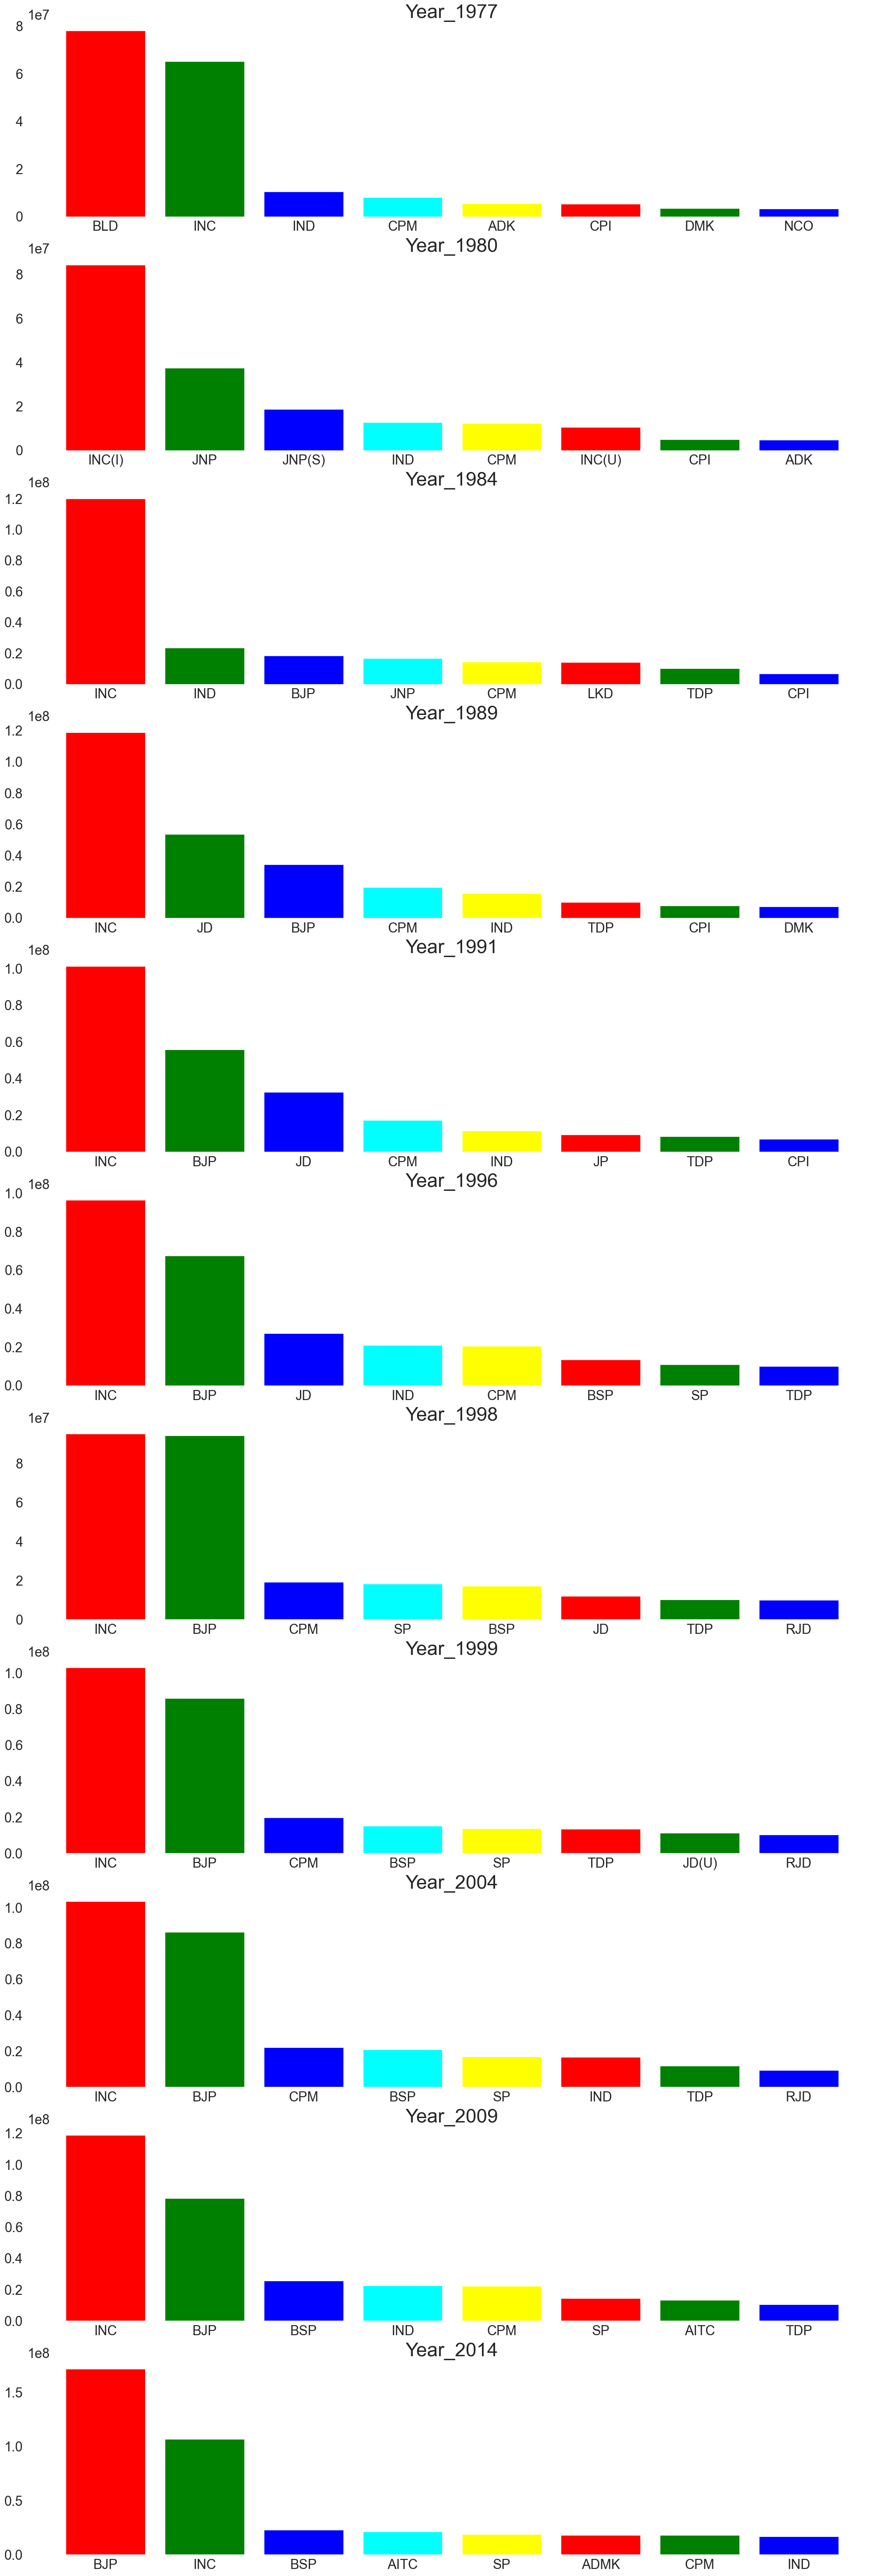

In [83]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (25,75))
for index,(key,value) in enumerate(yearwise_partywise_total_votes_again.items()):
    dataframe = yearwise_partywise_total_votes_again[key]
    plt.subplot(11, 1, index+1)
    plt.bar(dataframe['Party'],dataframe['totvotpoll'],color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
    plt.title(key)

## **Step-5:** Summarizing the inferences & writing my conclusions

Here we have focused on Indian national elections of the period of 1977-2014. We discussed the parties performance over the year. We also explored the constituencywise party performance. We also discussed the Results of 2014 in Uttar Pradesh and Results of 1977 election in West Bengal.

1. In Uttar Pradesh, 'BJP' shares highest vote shares and won the election by gain in total number of seat leading numbers. 
2. In West Bengal 1977 elections, BLD is the most popular party and won highestt number of seats.


Overall, we found that 

- INC is the most popular party by vote share. 
- INC lead this list until 2014 elections. 
- In 2014 general elections, BJP won the maximum seats. 
- In 2014 elections 'BJP' is the most popular party and has highest vote shares.

## Step-6: Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

We have found in our limited analysis that, with time vote share of each party changes. In the early phase of the free india, INC is the popular party and had most shares. With time, there popularity decreases and during 90's, they lost there charm and slowly BJP gaining ground. I guess, it because of the econmic crisis of India in 1990 and some other global issues like end of 'Cold war' between the USA and Russia. Also some other factors like, Persian Gulf crisis in early 1991 also played major financial crisis and hence lead to low saving and high load of the country. All these may have lead to high inflation in the cocuntry and the slowing down of the INC popularity. One local effects that may also have played an key role in gaining popularity by BJP is the Babri Masjid dimolotion incident. Over all INC kepts national status with time and formed gov at various instances either solely or in aliance. 

## **Step-7:** Submission & share of the work

Let us save and upload our work to Jovian before continuing.

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## **Step-7:** My link on Medium for the present work

I will write a sort blog post on my Medium and  account and share it with Jovian family soon.


- [My Medium account](https://medium.com/@arunp77)
- [My patreon blog](https://www.patreon.com/user?u=87801682)

## Future Work

In future, I would like to answer some other questions like:

1. Year wise change in the voteshare for each party in each state.
2. It would be interesting to see the changes in the voteshare over time and any relation between the 'totvotpoll' and 'Voting %'.
3. Also it would be interesing to see, if these two do have some relations then what are there implications to the leading party in each constituency and hence to the national elections.
4. It would be great idea, if I could find some relation between the international events and there role to the popularity of a party in indian elections. 

## References

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

1. [Dataset reference](https://www.kaggle.com/datasets/awadhi123/indian-election-dataset)
2. [My Github Matplotlib python notebook](https://github.com/arunsinp/Machine-Learning/blob/main/EDA1.ipynb)
3. https://github.com/arunsinp/Machine-Learning/blob/main/EDA1.ipynb
4. [My Github Pandas python notebook](https://github.com/arunsinp/Python-programming/blob/main/Python-fundamental/Pandas-python.ipynb)